Download data

In [2]:
download_demo?

Signature: download_demo(name: str = 'Sue_2x_3000_40_-46.tif', save_folder: str = '') -> str
Docstring:
download a file from the file list with the url of its location


using urllib, you can add you own name and location in this global parameter

    Args:
        name: str
            the path of the file correspondong to a file in the filelist (''Sue_2x_3000_40_-46.tif' or 'demoMovieJ.tif')

        save_folder: str
            folder inside ./example_movies to which the files will be saved. Will be created if it doesn't exist
    Returns:
        Path of the saved file
Raise:
    WrongFolder Exception
File:      c:\users\sangeetha\anaconda3\envs\caiman\lib\site-packages\caiman\utils\utils.py
Type:      function

In [6]:
# Long to download: Make the data available before hand to participants
from caiman.utils.utils import download_demo
fnames = 'Sue_2x_3000_40_-46.tif'
fnames = download_demo(fnames)
# fnames = download_demo(fnames, save_folder='sue_data')
fnames

'C:\\Users\\sangeetha\\caiman_data\\example_movies\\sue_data\\Sue_2x_3000_40_-46.tif'

Loading movie chain

In [25]:
import caiman as cm
cm.load_movie_chain?

Signature:
cm.load_movie_chain(
    file_list: List[str],
    fr: float = 30,
    start_time=0,
    meta_data=None,
    subindices=None,
    var_name_hdf5: str = 'mov',
    bottom=0,
    top=0,
    left=0,
    right=0,
    z_top=0,
    z_bottom=0,
    is3D: bool = False,
    channel=None,
    outtype=<class 'numpy.float32'>,
) -> Any
Docstring:
load movies from list of file names

Args:
    file_list: list
       file names in string format

    the other parameters as in load_movie except

    bottom, top, left, right, z_top, z_bottom : int
        to load only portion of the field of view

    is3D : bool
        flag for 3d data (adds a fourth dimension)

Returns:
    movie: movie
        movie corresponding to the concatenation og the input files
File:      c:\users\sangeetha\anaconda3\envs\caiman\lib\site-packages\caiman\base\movies.py
Type:      function

In [23]:
# what is start_time?

In [30]:
import caiman as cm 
m_orig = cm.load_movie_chain(file_list=[fnames])
m_orig.shape
# cm.play_movie(m_orig)
# cm.play_movie(m_orig, plot_text=True)
# cm.play_movie(m_orig, plot_text=True, gain=15)

# m_orig = cm.load_movie_chain(file_list=[fnames], fr=1)
# m_orig.shape
# cm.play_movie(m_orig, plot_text=True)

# m_orig = cm.load_movie_chain(file_list=[fnames], start_time=100)
# m_orig.shape
# cm.play_movie(m_orig, plot_text=True)

100%|██████████| 1/1 [00:00<00:00,  4.79it/s]


In [31]:
from caiman.motion_correction import MotionCorrect
MotionCorrect?

Init signature:
MotionCorrect(
    fname,
    min_mov=None,
    dview=None,
    max_shifts=(6, 6),
    niter_rig=1,
    splits_rig=14,
    num_splits_to_process_rig=None,
    strides=(96, 96),
    overlaps=(32, 32),
    splits_els=14,
    num_splits_to_process_els=None,
    upsample_factor_grid=4,
    max_deviation_rigid=3,
    shifts_opencv=True,
    nonneg_movie=True,
    gSig_filt=None,
    use_cuda=False,
    border_nan=True,
    pw_rigid=False,
    num_frames_split=80,
    var_name_hdf5='mov',
    is3D=False,
    indices=(slice(None, None, None), slice(None, None, None)),
)
Docstring:      class implementing motion correction operations
Init docstring:
 Constructor class for motion correction operations

 Args:
    fname: str
        path to file to motion correct

    min_mov: int16 or float32
        estimated minimum value of the movie to produce an output that is positive

    dview: ipyparallel view object list
        to perform parallel computing, if NOne will operate in si

In [49]:
mc = MotionCorrect(fname=fnames)
mc.motion_correct(save_movie=True)

c:\Users\sangeetha\anaconda3\envs\caiman\lib\site-packages\caiman\motion_correction.py:3118: RuntimeWarning: Mean of empty slice
  new_temp = np.nanmean(mc, 0)


In [51]:

mc.apply_shifts_movie?

Signature:
mc.apply_shifts_movie(
    fname,
    rigid_shifts: bool = None,
    save_memmap: bool = False,
    save_base_name: str = 'MC',
    order: str = 'F',
    remove_min: bool = True,
)
Docstring:
Applies shifts found by registering one file to a different file. Useful
for cases when shifts computed from a structural channel are applied to a
functional channel. Currently only application of shifts through openCV is
supported. Returns either cm.movie or the path to a memory mapped file.

Args:
    fname: str of List[str]
        name(s) of the movie to motion correct. It should not contain
        nans. All the loadable formats from CaImAn are acceptable

    rigid_shifts: bool (True)
        apply rigid or pw-rigid shifts (must exist in the mc object)
        deprectated (read directly from mc.pw_rigid)

    save_memmap: bool (False)
        flag for saving the resulting file in memory mapped form

    save_base_name: str ['MC']
        base name for memory mapped file name

    

In [58]:
import matplotlib.pyplot as plt
shifts = mc.apply_shifts_movie(fname=fnames)

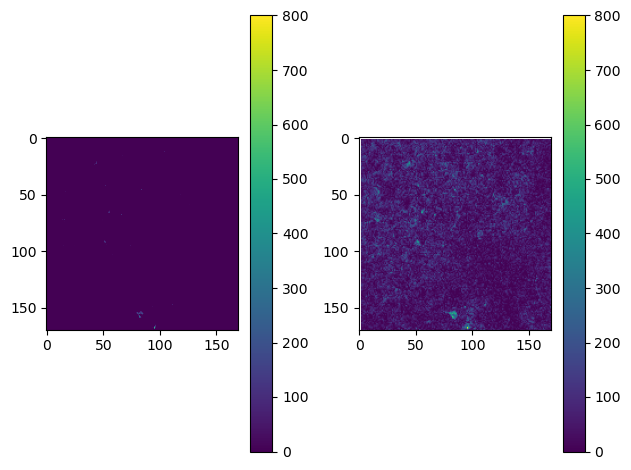

In [72]:
plt.subplot(121)
plt.imshow(m_orig[1], vmin=0, vmax=800)
plt.colorbar()

plt.subplot(122)
plt.imshow(shifts[1], vmin=0, vmax=800)
plt.colorbar()

plt.tight_layout()

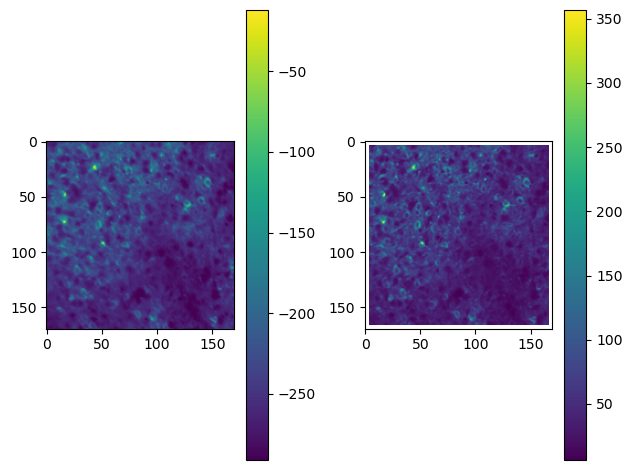

In [74]:
import numpy as np

plt.subplot(121)
plt.imshow(np.median(m_orig, axis=0))
plt.colorbar()

plt.subplot(122)
plt.imshow(np.median(shifts, axis=0))
plt.colorbar()

plt.tight_layout()

In [88]:
mc.motion_correct_rigid(save_movie=True)
mc.fname_tot_rig

c:\Users\sangeetha\anaconda3\envs\caiman\lib\site-packages\caiman\motion_correction.py:3118: RuntimeWarning: Mean of empty slice
  new_temp = np.nanmean(mc, 0)


['C:\\Users\\sangeetha\\caiman_data\\example_movies\\sue_data\\Sue_2x_3000_40_-46_rig__d1_170_d2_170_d3_1_order_F_frames_3000.mmap']

In [89]:
mc.motion_correct_pwrigid(save_movie=True)
mc.fname_tot_els

['C:\\Users\\sangeetha\\caiman_data\\example_movies\\sue_data\\Sue_2x_3000_40_-46_els__d1_170_d2_170_d3_1_order_F_frames_3000.mmap']

In [91]:
m_orig[:100].save('test.tif')

In [93]:
fname = ['test.tif']
m_part = cm.load_movie_chain(fname)
cm.play_movie(m_part, plot_text=True)

100%|██████████| 1/1 [00:00<00:00, 52.64it/s]


c:\Users\sangeetha\anaconda3\envs\caiman\lib\site-packages\caiman\motion_correction.py:3118: RuntimeWarning: Mean of empty slice
  new_temp = np.nanmean(mc, 0)


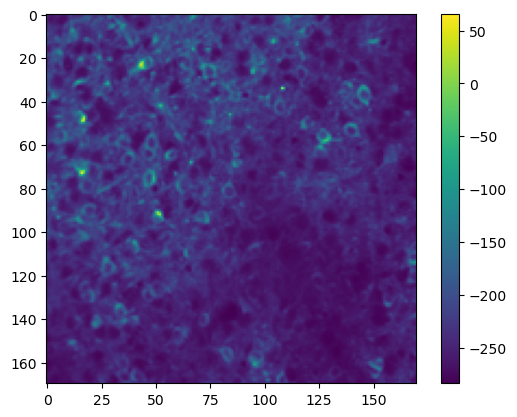

In [95]:
# Rigid
mc.motion_correct_rigid(save_movie=True)
mc.fname_tot_rig
plt.imshow(mc.total_template_rig)
plt.colorbar()

c:\Users\sangeetha\anaconda3\envs\caiman\lib\site-packages\caiman\motion_correction.py:3118: RuntimeWarning: Mean of empty slice
  new_temp = np.nanmean(mc, 0)


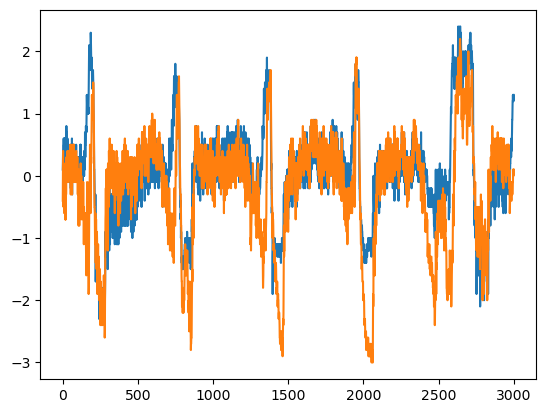

In [97]:
# Rigid
mc.motion_correct_rigid(save_movie=True)
plt.plot(mc.shifts_rig)

c:\Users\sangeetha\anaconda3\envs\caiman\lib\site-packages\caiman\motion_correction.py:3118: RuntimeWarning: Mean of empty slice
  new_temp = np.nanmean(mc, 0)


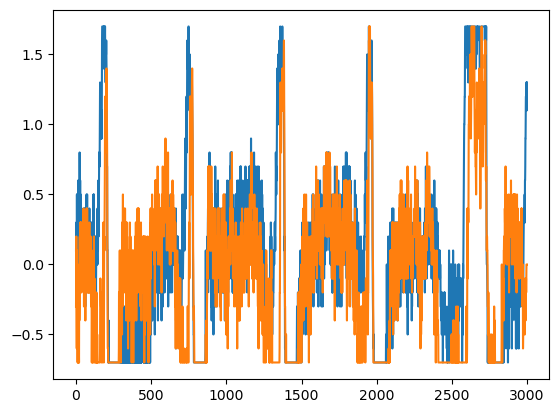

In [104]:
# Rigid
mc = MotionCorrect(
    fname=fnames,
    max_shifts=(1, 1),
    pw_rigid=False
)
mc.motion_correct(
    save_movie=True,
    )
plt.plot(mc.shifts_rig)

c:\Users\sangeetha\anaconda3\envs\caiman\lib\site-packages\caiman\motion_correction.py:3118: RuntimeWarning: Mean of empty slice
  new_temp = np.nanmean(mc, 0)


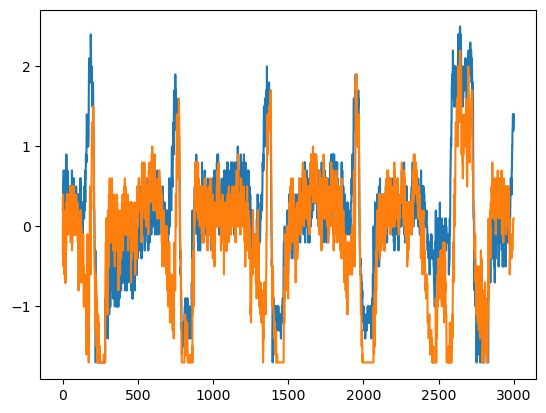

In [115]:
# Rigid
mc = MotionCorrect(
    fname=fnames,
    max_shifts=(2, 2),
    pw_rigid=False
)
mc.motion_correct(
    save_movie=True,
    )
plt.plot(mc.shifts_rig)

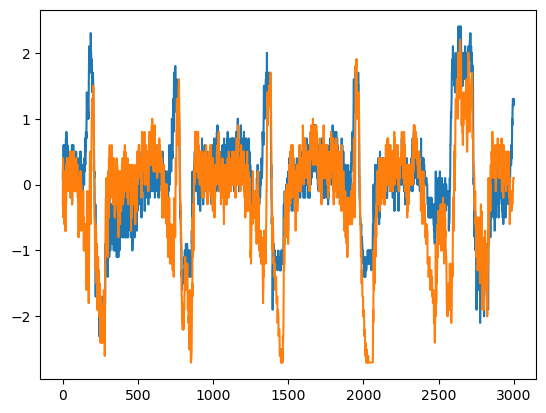

In [116]:
# Rigid
mc = MotionCorrect(
    fname=fnames,
    max_shifts=(3, 3),
    pw_rigid=False
)
mc.motion_correct(
    save_movie=True,
    )
plt.plot(mc.shifts_rig)

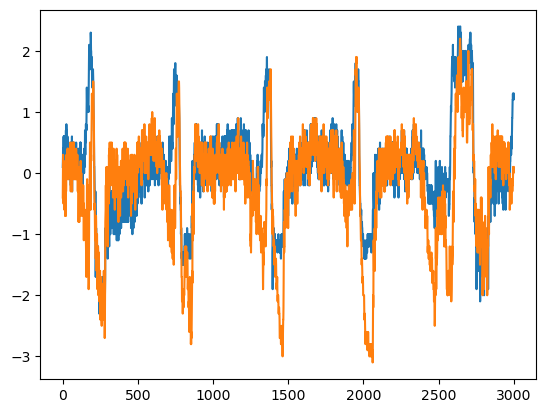

In [117]:
# Rigid
mc = MotionCorrect(
    fname=fnames,
    max_shifts=(4, 4),
    pw_rigid=False
)
mc.motion_correct(
    save_movie=True,
    )
plt.plot(mc.shifts_rig)

100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


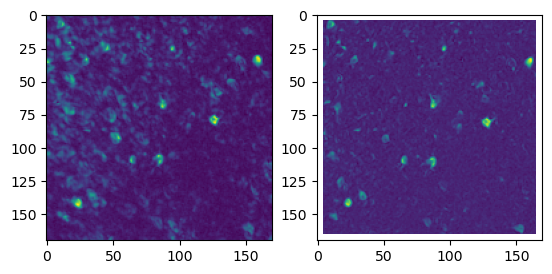

In [124]:
m_rig = cm.load(mc.fname_tot_rig)

plt.subplot(121)
plt.imshow(m_orig.local_correlations())

plt.subplot(122)
plt.imshow(m_rig.local_correlations())


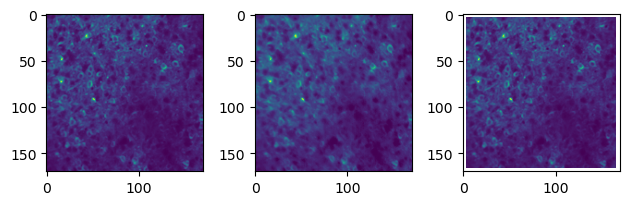

In [127]:
plt.subplot(131)
plt.imshow(mc.total_template_rig)

plt.subplot(132)
plt.imshow(np.median(m_orig, axis=0))

plt.subplot(133)
plt.imshow(np.median(m_rig, axis=0))

plt.tight_layout()

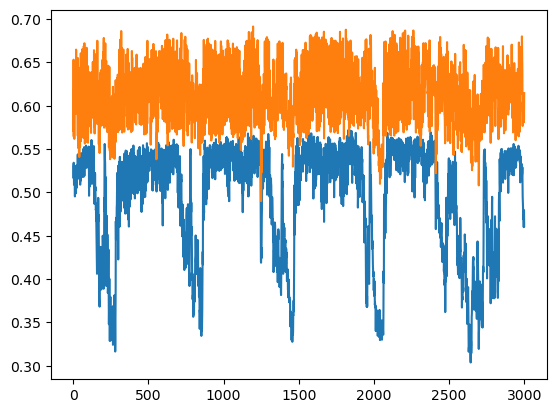

In [148]:
# Quality check
x_shifts = list(list(zip(*mc.shifts_rig))[0])
y_shifts = list(list(zip(*mc.shifts_rig))[1])

bord_px_els = np.ceil(np.maximum(np.max(np.abs(x_shifts)),
                                 np.max(np.abs(y_shifts)))).astype(int)
final_size = np.subtract(mc.total_template_rig.shape, 2 * bord_px_els) # remove pixels in the boundaries

tmpl_orig, correlations_orig, flows_orig, norms_orig, crispness_orig = cm.motion_correction.compute_metrics_motion_correction(fnames, final_size[0], final_size[1], swap_dim=False)
tmpl_rig, correlations_rig, flows_rig, norms_rig, crispness_rig = cm.motion_correction.compute_metrics_motion_correction(mc.fname_tot_rig[0], final_size[0], final_size[1], swap_dim=False)

plt.plot(correlations_orig)
plt.plot(correlations_rig)


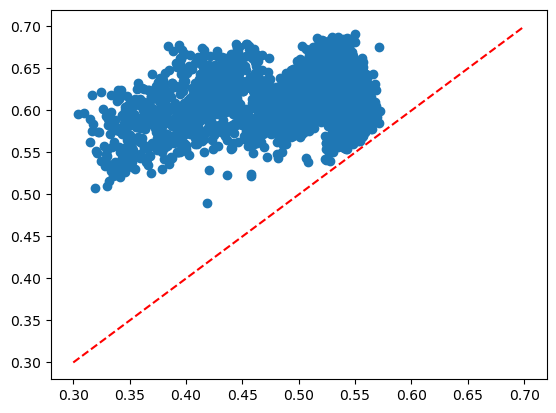

In [152]:
plt.scatter(correlations_orig, correlations_rig)
plt.plot([0.3,0.7], [0.3, 0.7], 'r--')

c:\Users\sangeetha\anaconda3\envs\caiman\lib\site-packages\caiman\motion_correction.py:3118: RuntimeWarning: Mean of empty slice
  new_temp = np.nanmean(mc, 0)


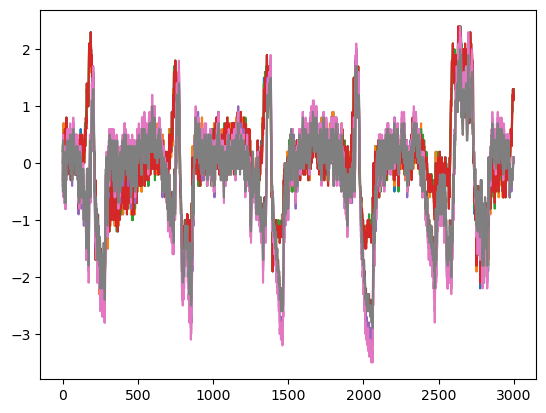

In [153]:
# Piecewise rigid
mc = MotionCorrect(
    fname=fnames,
    pw_rigid=True,
)
mc.motion_correct(
    save_movie=True,
    )

plt.plot(mc.x_shifts_els)
plt.plot(mc.y_shifts_els)

100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


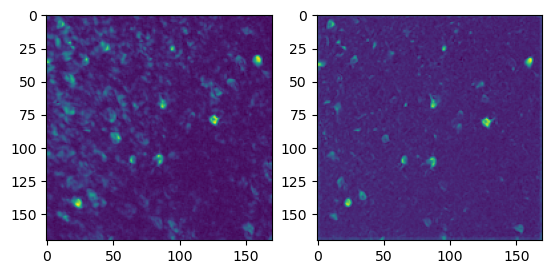

In [154]:
m_els = cm.load(mc.fname_tot_els)

plt.subplot(121)
plt.imshow(m_orig.local_correlations())

plt.subplot(122)
plt.imshow(m_els.local_correlations())


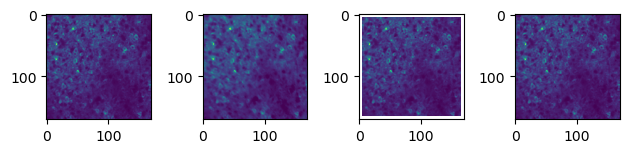

In [157]:
plt.subplot(141)
plt.imshow(mc.total_template_els)

plt.subplot(142)
plt.imshow(np.median(m_orig, axis=0))

plt.subplot(143)
plt.imshow(np.median(m_rig, axis=0))

plt.subplot(144)
plt.imshow(np.median(m_els, axis=0))

plt.tight_layout()

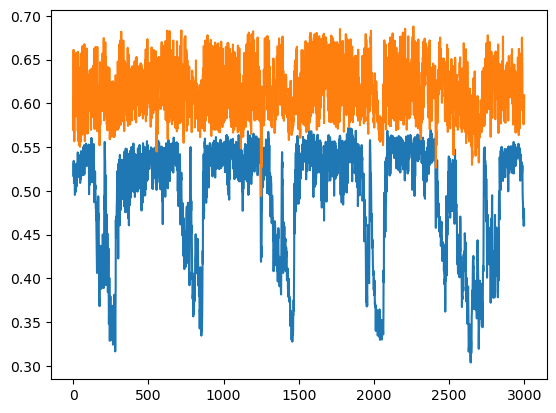

In [158]:
# Quality check
bord_px_els = np.ceil(np.maximum(np.max(np.abs(mc.x_shifts_els)),
                                 np.max(np.abs(mc.y_shifts_els)))).astype(int)
final_size = np.subtract(mc.total_template_els.shape, 2 * bord_px_els) # remove pixels in the boundaries

tmpl_orig, correlations_orig, flows_orig, norms_orig, crispness_orig = cm.motion_correction.compute_metrics_motion_correction(fnames, final_size[0], final_size[1], swap_dim=False)
tmpl_els, correlations_els, flows_els, norms_els, crispness_els = cm.motion_correction.compute_metrics_motion_correction(mc.fname_tot_els[0], final_size[0], final_size[1], swap_dim=False)

plt.plot(correlations_orig)
plt.plot(correlations_els)


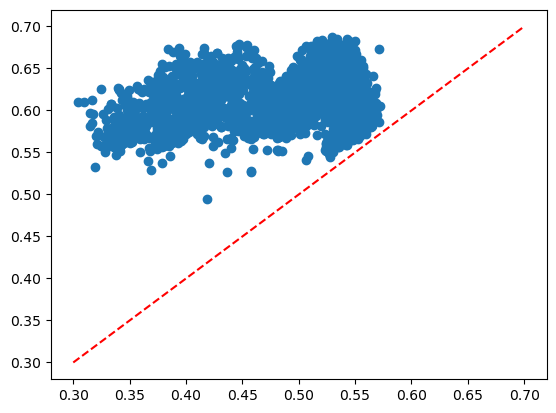

In [159]:
plt.scatter(correlations_orig, correlations_els)
plt.plot([0.3,0.7], [0.3, 0.7], 'r--')

c:\Users\sangeetha\anaconda3\envs\caiman\lib\site-packages\caiman\motion_correction.py:3118: RuntimeWarning: Mean of empty slice
  new_temp = np.nanmean(mc, 0)


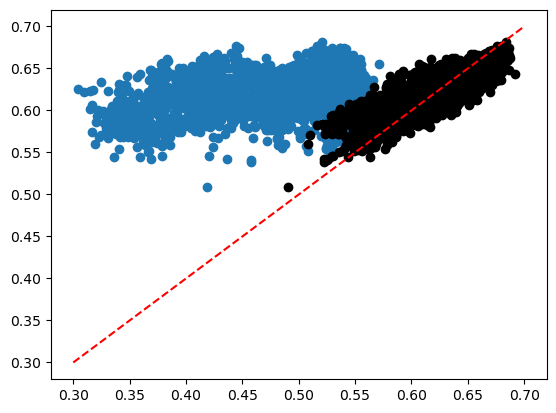

In [169]:
# Piecewise rigid
mc = MotionCorrect(
    fname=fnames,
    pw_rigid=True,
    strides=(48, 48),
    overlaps=(24, 24),
    max_deviation_rigid=3,
    max_shifts=(6,6)
)
mc.motion_correct(
    save_movie=True,
    )

# Quality check
bord_px_els = np.ceil(np.maximum(np.max(np.abs(mc.x_shifts_els)),
                                 np.max(np.abs(mc.y_shifts_els)))).astype(int)
final_size = np.subtract(mc.total_template_els.shape, 2 * bord_px_els) # remove pixels in the boundaries

tmpl_orig, correlations_orig, flows_orig, norms_orig, crispness_orig = cm.motion_correction.compute_metrics_motion_correction(fnames, final_size[0], final_size[1], swap_dim=False)
tmpl_els, correlations_els, flows_els, norms_els, crispness_els = cm.motion_correction.compute_metrics_motion_correction(mc.fname_tot_els[0], final_size[0], final_size[1], swap_dim=False)

plt.scatter(correlations_orig, correlations_els)
plt.scatter(correlations_rig, correlations_els, color='k')

plt.plot([0.3,0.7], [0.3, 0.7], 'r--')

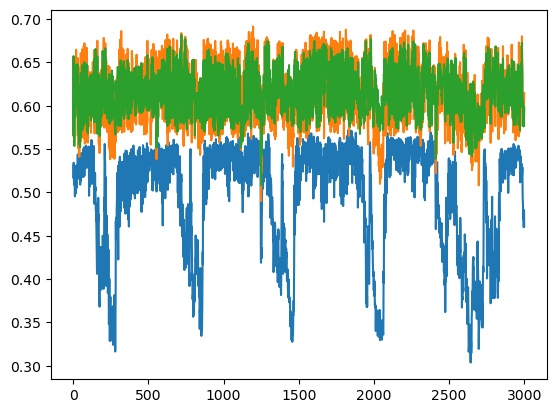

In [168]:
plt.plot(correlations_orig)
plt.plot(correlations_rig)
plt.plot(correlations_els)


In [170]:
# print crispness values
print('Crispness original: ' + str(int(crispness_orig)))
print('Crispness rigid: ' + str(int(crispness_rig)))
print('Crispness elastic: ' + str(int(crispness_els)))

Crispness original: 1937
Crispness rigid: 2759
Crispness elastic: 2848
